 image.png



  



>[Task 1 – Problem Statement Formulation and definition](#scrollTo=wKZeFcf1s9yh)

>>[Importing The Required Libraries](#scrollTo=K_Ge4NhPBny3)

>>[-Motivation:](#scrollTo=nsJOggfy4a_b)

>>[-Problem Statement / Project Definition:](#scrollTo=DGh-n7Br4aqi)

>>[-Expected Result:](#scrollTo=4YMDMTKe4aTL)

>[Task 2 - Selection of an Appropriate Data Set (Data Collection)](#scrollTo=5XR8Zhx8tdX7)

>>[Loading The Datset (csv file)](#scrollTo=i4MxgXcK37LA)

>>[-Source of Dataset – reason why you chose the dataset:](#scrollTo=VJqb-V60wKuv)

>>[Dataset](#scrollTo=6EdNOow1v8Yb)

>>[Visualize the initial data to understand the distribution and summary of the data and display the initial data:](#scrollTo=6pS-L9nMvzs2)

>>[-Also provide the “shape” of the dataset:](#scrollTo=SRPOQ-_4k2yc)

>>[Categorical-changing them to numbers.](#scrollTo=8STvWxg1ehj7)

>[Task 3 –Text Preprocessing](#scrollTo=b3FP423Txwos)

>>[Handling stopwords:](#scrollTo=PPVgubfM6sq9)

>>[Handling Punctuations](#scrollTo=T7vQ-DCF6thn)

>>[-Lemmatization and why it is used:](#scrollTo=Wd8UazIc7x9v)

>>[Text Lowercase](#scrollTo=0dQmOJeY_uSy)

>>[-Performing the text preprocessing](#scrollTo=N1r-MGpt7G0v)

>[Task 4- Text Representation](#scrollTo=fT_FBQ36x440)

>>[Term Frequency-Inverse Document Frequency Vectorizer](#scrollTo=YgcnprPy2qlZ)

>>[Bag of Words](#scrollTo=G8iqUE9h2RCy)

>>[Word2Vec](#scrollTo=l8Qumf0Z9WZk)

>[Dividing dataset into training and testing set](#scrollTo=5ivU_fidd4H0)

>[Task 5 –Text Classification / Prediction](#scrollTo=0BugBnIuzDXX)

>>[Gaussian Naive Bayes Classifier](#scrollTo=4epKovDQdpJ_)

>>[Logistic Regression](#scrollTo=MCz9RvWNH3M0)

>>[Multinomial Naive Bayes](#scrollTo=yE1FbPigH9IZ)

>[Task 6 - Evaluation , Inferences, Recommendation and Reflection](#scrollTo=H0RTv2gj-738)

>>[Comparing the ROC-AUC Curve for the Classifiers (gnb,lr,mnb)](#scrollTo=vcFLUQNhA7p8)

>>[Comparing the Acccuracy in the Classifiers](#scrollTo=HnHHT7W7BKJU)

>>[Comparing the Classifiers in terms of Confusion Matrix](#scrollTo=oK7wB0lyBCNh)

>>[Prediction Test by using the Models](#scrollTo=pLNoTTggBX6g)

>>>[Testing the Gaussian Naive Bayes Model](#scrollTo=pfea3PP1CkgG)

>>>[Testing the Multinomial NB Model](#scrollTo=aN9_q7SqB244)

>>>[Testing the Logistic Regression Model](#scrollTo=VMmzSkoTCAKa)

>>[Conclusion & Recommendation](#scrollTo=NeFD0iy0C14p)

>[Task 7 - Log File](#scrollTo=f8_iwiHka5v1)

>[Task 8 - References](#scrollTo=IWNQu60tYuIo)

>[Task 9 - GitHub Link](#scrollTo=KHQGVmUZYhRH)



#Task 1 – Problem Statement Formulation and definition



##Importing The Required Libraries

In [375]:
import numpy as np
import pandas as pd
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from gensim.models import Word2Vec
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordcloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##-Motivation:
The motivation behind the rotten tomatoes movie review sentiment classification project is to develop a system that can accurately classify the sentiment of movie reviews.
This can be valuable for various applications, such as helping users make informed decisions about which movies to watch, providing feedback to movie producers, and analyzing public opinion about movies.

##-Problem Statement / Project Definition:
The problem statement for the rotten tomatoes movie review sentiment classification project is to build a machine learning model that can classify movie reviews as either positive or negative based on the sentiment expressed in the text. The objective is to accurately predict the sentiment of movie reviews and provide a reliable classification system.

##-Expected Result:
The expected result of this task is to develop a model that can effectively classify movie reviews into positive or negative sentiment categories. The model should achieve a high level of accuracy in its predictions, allowing users to confidently rely on its sentiment classification for movie reviews. Additionally, the model should be scalable and capable of handling a large volume of movie reviews in real-time.

By achieving these objectives, the rotten tomatoes movie review sentiment classification project aims to provide a valuable tool for movie enthusiasts, industry professionals, and researchers to analyze and understand the sentiment expressed in movie reviews.

#Task 2 - Selection of an Appropriate Data Set (Data Collection)


##Loading The Datset (csv file)

In [461]:
dataset=pd.read_csv('/content/Rottentomatoes Movie Reviews19300.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9641 non-null   int64  
 1   Movie       9641 non-null   object 
 2   Reviewer    9641 non-null   object 
 3   Publish     9641 non-null   object 
 4   Review      9641 non-null   object 
 5   Date        9641 non-null   object 
 6   Score       9641 non-null   float64
 7   Sentiment   9641 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 602.7+ KB


##-Source of Dataset – reason why you chose the dataset:
The Rotten Tomatoes movie reviews sentiment classification dataset is a popular dataset used for sentiment analysis experiments
It contains 417058 processed sentences from Rotten Tomatoes movie reviews, labeled with respect to their overall sentiment polarity (Good or Bad). Exploiting class relationships for sentiment categorization with respect to rating, The dataset is widely used in the field of natural language processing and machine learning due to its large size and high quality.

-For this project I will be working on, I will only be working on 9.641k rows of my dataset due to my laptop RAM can't process a very huge dataset which contains more than 400k rows

##Dataset



*  URL:https://www.kaggle.com/datasets/talha002/rottentomatoes-400k-review/
*  Website title: Kaggle
*  Data accessed: October 9, 2022
*  Author:Talha Sahin
*   Author Profile:https://www.kaggle.com/talha002
*   Dataset Size:  
*   Columns: 8
*   Rows: 417058
*   File: 1
*   File Type: csv file

##-	Visualize the initial data to understand the distribution and summary of the data and display the initial data:




In [464]:
data_good = dataset[dataset['Sentiment'] == 'Good'].copy()


In [465]:
film_mask = np.array(Image.open("film2.png"))

In [466]:
def show_wordcloud(df, title):
  text = ' '.join(df['Review'].astype(str).tolist())
  stopwords = set(wordcloud.STOPWORDS)
  wc = WordCloud(background_color="white", max_words=1000, mask=film_mask,
                stopwords=stopwords, contour_width=3, contour_color='firebrick')

  wc.generate(text)

  wc.to_file("film2.png")

  plt.figure()
  plt.imshow(wc, interpolation='bilinear')
  plt.title(title, fontsize=20 )
  plt.tight_layout(pad=0)
  plt.axis("off")
  plt.show()

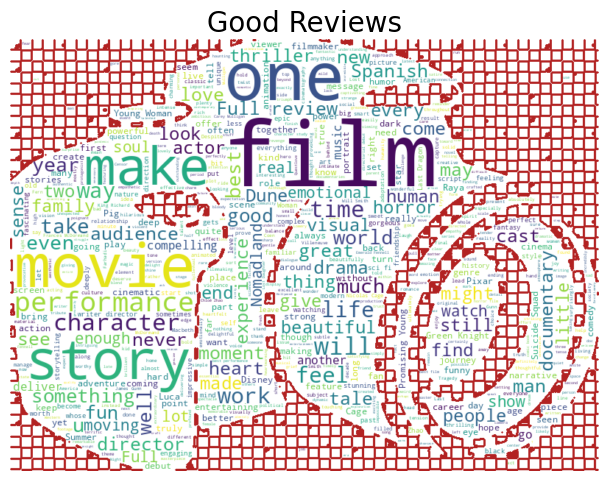

In [467]:
show_wordcloud(data_good, "Good Reviews")

In [381]:
dataset.head()

Unnamed: 0                              Movie          Reviewer  \
0           0  HOTEL TRANSYLVANIA: TRANSFORMANIA     James Luxford   
1           1  HOTEL TRANSYLVANIA: TRANSFORMANIA        Mat Brunet   
2           2  HOTEL TRANSYLVANIA: TRANSFORMANIA      Robert Levin   
3           3  HOTEL TRANSYLVANIA: TRANSFORMANIA  Jackie K. Cooper   
4           4  HOTEL TRANSYLVANIA: TRANSFORMANIA     Asher Luberto   

                     Publish  \
0                    City AM   
1  AniMat's Review (YouTube)   
2                    Newsday   
3          jackiekcooper.com   
4               The Playlist   

                                              Review        Date  Score  \
0  I guess its always been hard for me to see the...    3/3/2022   40.0   
1  Hotel Transylvania: Transformania is a present...  15/02/2022   30.0   
2  The conceit still works well enough to mostly ...  29/01/2022   75.0   
3  No Adam Sandler this time out, but the animate...  28/01/2022   60.0   
4  It's not likely we'll see another one of these...  28/01/2022   74.0   

  Sentiment  
0       Bad  
1       Bad  
2      Good  
3       Bad  
4      Good

As we can see from the plot shown below the data shows a sentiment analysis where 51% of the sentiments are bad and 48% are good, which means that the dataset is almost balanced.

In [382]:
count_Class = pd.value_counts(dataset["Sentiment"], sort=True)
count_Class.plot(kind='bar',  figsize=(10, 5),color=["lightgreen", "darkred"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Good vs Bad Reviews")
plt.show()

In [383]:
dataset["Sentiment"].value_counts()/dataset.shape[0]

Good    0.514055
Bad     0.485945
Name: Sentiment, dtype: float64

##-Also provide the “shape” of the dataset:


In [384]:
dataset.shape

(9641, 8)

In [385]:
#dataset = dataset[:16000]
#dataset.shape


## Categorical-changing them to numbers.
-The Sentiment column is changed from categorical to numerical (Good & Bad are changed to 1 & 0)

In [386]:
dataset['Sentiment'] = dataset.Sentiment.map({'Good':1, 'Bad':0})
dataset = dataset[["Review","Sentiment"]]

In [387]:
dataset.shape

(9641, 2)

In [388]:
dataset.head(10)

Review  Sentiment
0  I guess its always been hard for me to see the...          0
1  Hotel Transylvania: Transformania is a present...          0
2  The conceit still works well enough to mostly ...          1
3  No Adam Sandler this time out, but the animate...          0
4  It's not likely we'll see another one of these...          1
5  A lukewarm sendoff that mostly feels like a le...          0
6  Starts off sloppy, but brings a fair amount of...          1
7  Genuinely fun and touching in parts, Hotel Tra...          0
8  Four films in, perhaps it's time to hang up th...          0
9  A nice to spend some time with family. [Full r...          0

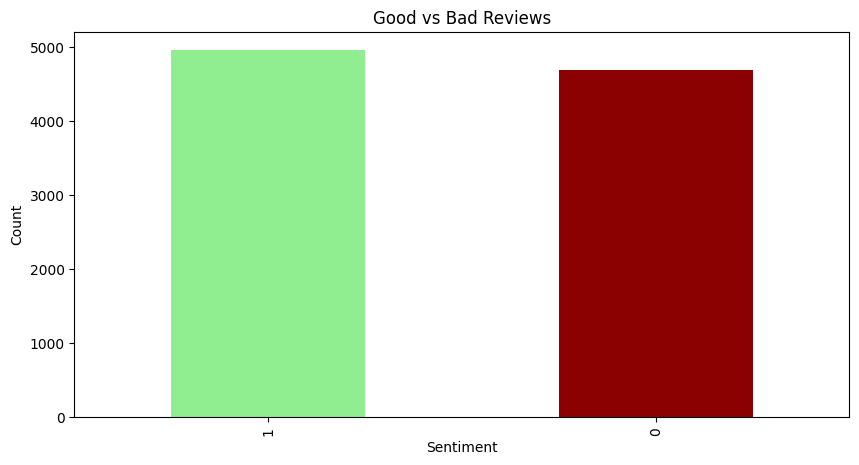

In [389]:
count_Class = pd.value_counts(dataset["Sentiment"], sort=True)
count_Class.plot(kind='bar', figsize=(10, 5), color=["lightgreen", "darkred"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Good vs Bad Reviews")
plt.show()

In [390]:
dataset["Sentiment"].value_counts()/dataset.shape[0]


1    0.514055
0    0.485945
Name: Sentiment, dtype: float64

#Task 3 –Text Preprocessing
text preprocessing is important in NLP because it helps in transforming raw text into a form that machines can understand and analyze, leading to better model performance and more accurate results.

##Handling stopwords:
-stopwords refer to common words that often appear in a text but carry little or no significant meaning.


*   Noise Reduction
*   Improved Performance

*   Efficient Computation
*   Enhanced Interpretability





In [391]:
def remove_stopwords(text):
  stop_words = set(stopwords.words("english"))
  stop_words.remove('not')
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word not in stop_words]
  return filtered_text

##Handling Punctuations


*   Preservation of Context
*   Sentence Segmentation
*   Preprocessing Consistency





In [392]:
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

##-Lemmatization and why it is used:
-Lemmatization is a text preprocessing technique used in Natural Language Processing (NLP) to break a word down to its root meaning to identify similarities.
          
-lemmatization is used in text preprocessing in NLP because it helps in reducing the number of unique words in a text document, making it easier to analyze and understand.

In [393]:
lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
  lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in review]
  return lemmas

##Text Lowercase


*   Vocabulary reduction
*   Standardization



In [394]:
def text_lowercase(text):
  return text.lower()

##-Performing the text preprocessing
text preprocessing in the Review column and storing them in a corpus list to be used later in the sentiment classification

In [395]:
from nltk.stem.porter import PorterStemmer
stop_words = set(stopwords.words("english"))
stop_words.remove('not')
ps= PorterStemmer()
corpus = []
for i in range(0, len(dataset['Review'])):
  review=remove_punctuation(dataset['Review'][i])
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
  review= remove_stopwords(review)
  review = str(review).split()
  review= [ps.stem(word) for word in review if not word in set (stop_words)]
  #review=lemmatize_word(review)
  review = ' '.join(review)
  corpus.append(review)

In [396]:
print(corpus[4])

['not', 'likely', 'well', 'see', 'another', 'one', 'things', 'ask', 'another', 'stay', 'transylvania', 'wouldnt', 'bad']


#Task 4- Text Representation

##Term Frequency-Inverse Document Frequency Vectorizer
-The TF-IDF vectorizer is important in NLP sentiment analysis because it converts text documents into numerical feature vectors, allowing machine learning algorithms to work with the textual data.


*   Numerical Representation
*   Term Importance



In [397]:
vectorizer = TfidfVectorizer(max_features=20000)
X = vectorizer.fit_transform(corpus).toarray()
y = dataset['Sentiment'].values


In [398]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [399]:
X.shape

(9641, 18452)

In [400]:
y.shape

(9641,)

##Bag of Words
-The bag of words (BoW) model is important in NLP sentiment analysis due to its simplicity and effectiveness in capturing the frequency-based characteristics of text.

*  Simplicity  
*  Feature Exteraction



In [401]:
#Creating Bag of Words
cv=CountVectorizer(max_features=8000)
X1 = cv.fit_transform(corpus)
cv_dataframe = pd.DataFrame(X1.toarray(), columns=cv.get_feature_names_out())
y1= dataset['Sentiment'].values

In [402]:
print(cv_dataframe)

      abandon  abandoned  abandons  abbey  abel  abigail  abilities  ability  \
0           0          0         0      0     0        0          0        0   
1           0          0         0      0     0        0          0        0   
2           0          0         0      0     0        0          0        0   
3           0          0         0      0     0        0          0        0   
4           0          0         0      0     0        0          0        0   
...       ...        ...       ...    ...   ...      ...        ...      ...   
9636        0          0         0      0     0        0          0        0   
9637        0          0         0      0     0        0          0        0   
9638        0          0         0      0     0        0          0        0   
9639        0          0         0      0     0        0          0        0   
9640        0          0         0      0     0        0          1        0   

      able  aboveaverage  ...  zero  ze

##Word2Vec
-Word2Vec is important in sentiment analysis because it enables the representation of words in a continuous vector space that captures semantic relationships.


*   Semantic Similarity
*   Contextual Understanding



In [403]:
sentences = nltk.sent_tokenize(str(corpus))
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

In [404]:
for i in range(len(sentences)):
  sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]


In [405]:
print(sentences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [406]:
sentences[0]

['[',
 '``',
 '[',
 "'guess",
 "'",
 ',',
 "'always",
 "'",
 ',',
 "'hard",
 "'",
 ',',
 "'see",
 "'",
 ',',
 "'positive",
 "'",
 ',',
 "'side",
 "'",
 ',',
 "'things",
 "'",
 ',',
 "'drac",
 "'",
 ',',
 "'admits",
 "'",
 ',',
 "'hearttoheart",
 "'",
 ',',
 "'johnny",
 "'",
 ',',
 "'sentiment",
 "'",
 ',',
 "'many",
 "'",
 ',',
 "'share",
 "'",
 ',',
 "'watching",
 "'",
 ',',
 "'paperthin",
 "'",
 ',',
 "'franchises",
 "'",
 ',',
 "'lumbers",
 "'",
 ',',
 "'final",
 "'",
 ',',
 "'resting",
 "'",
 ',',
 "'place",
 "'",
 ']',
 "''",
 ',',
 '``',
 '[',
 "'hotel",
 "'",
 ',',
 "'transylvania",
 "'",
 ',',
 "'transformania",
 "'",
 ',',
 "'presentation",
 "'",
 ',',
 "'everything",
 "'",
 ',',
 "'thats",
 "'",
 ',',
 "'wrong",
 "'",
 ',',
 "'hotel",
 "'",
 ',',
 "'transylvania",
 "'",
 ',',
 "'franchise",
 "'",
 ',',
 "'amplifying",
 "'",
 ',',
 "'problems",
 "'",
 ',',
 "'deliver",
 "'",
 ',',
 "'miserably",
 "'",
 ',',
 "'tiring",
 "'",
 ',',
 "'experience",
 "'",
 ']',
 "''",
 ',',
 '``'

In [407]:
model = Word2Vec(sentences, min_count=1)


In [408]:
vector = model.wv["'hotel"]


In [409]:
vector

array([-0.16155814,  0.12169009,  0.06275016,  0.14617002,  0.04599993,
       -0.11326157,  0.0509971 ,  0.19819562, -0.15438274, -0.14062184,
        0.08823145, -0.11576524, -0.13626267,  0.14156476,  0.01796788,
       -0.0341114 ,  0.05133536,  0.01919139, -0.15204994, -0.14111626,
        0.06925276, -0.07682098,  0.2660671 ,  0.01441955,  0.02566009,
        0.0310451 ,  0.0064951 ,  0.01076561, -0.11625839,  0.12630472,
        0.08971912, -0.08955303,  0.03739929, -0.24215819,  0.02749946,
       -0.00648952,  0.15506865,  0.01915523,  0.02701724,  0.01464518,
       -0.05757367, -0.02596162, -0.19846873, -0.01704882,  0.01431773,
        0.0177322 , -0.0107407 ,  0.04525974,  0.06785777,  0.10952957,
        0.08722445, -0.14211726, -0.0682646 , -0.03405116,  0.03203952,
       -0.01066649,  0.11883999, -0.02415091, -0.04565514,  0.13003199,
       -0.05784485,  0.01710309, -0.00871975, -0.03729001,  0.04172233,
        0.15768735,  0.06624461, -0.00277805, -0.0346381 ,  0.07

In [410]:
similar = model.wv.most_similar("'goodbye")

In [411]:
similar

[("'yelp", 0.393061101436615),
 ("'election", 0.38805827498435974),
 ("'flair", 0.38436347246170044),
 ("'ditty", 0.3732410669326782),
 ("'impression", 0.36846962571144104),
 ("'sciencefictiontimetravel", 0.36743226647377014),
 ("'valiantly", 0.34801408648490906),
 ("'songs", 0.347067654132843),
 ("'respect", 0.34373509883880615),
 ("'babysitter", 0.33929917216300964)]

In [412]:
similar = model.wv.most_similar("'series")
similar

[("'characters", 0.9951088428497314),
 ("'stories", 0.9950865507125854),
 ("'farhadis", 0.9950037002563477),
 ("'coen", 0.9949769973754883),
 ("'experience", 0.9948762655258179),
 ("'iranian", 0.9948655366897583),
 ("'joel", 0.994851291179657),
 ("'like", 0.9948199987411499),
 ("'drama", 0.9947715401649475),
 ("'make", 0.9947691559791565)]

In [413]:
similar = model.wv.most_similar("'funny")
similar

[("'washington", 0.9970424771308899),
 ('``', 0.9970320463180542),
 ('[', 0.9970183372497559),
 ("'one", 0.9969643354415894),
 ("'macbeth", 0.9969563484191895),
 ("'film", 0.9969146847724915),
 ("'like", 0.996865451335907),
 ("'performances", 0.996836245059967),
 ("'coen", 0.9968218207359314),
 ("''", 0.9968101978302002)]

In [414]:
similar = model.wv.most_similar("'sweet")
similar

[("'aesthetically", 0.9788292646408081),
 ("'shakespearean", 0.9783169627189636),
 ("'last", 0.9782589077949524),
 ("'wont", 0.9780300259590149),
 ("'hamaguchis", 0.9779646396636963),
 ("'media", 0.977932870388031),
 ("'ways", 0.9778841733932495),
 ("'davenport", 0.9778704643249512),
 ("'get", 0.9778695702552795),
 ("'style", 0.9778265953063965)]

#Dividing dataset into training and testing set

In [415]:
X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=4)

In [416]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((7712, 18452), (1929, 18452), (7712,), (1929,))

# Task 5 –Text Classification / Prediction
-text classification in sentiment analysis automates and streamlines the process, making it scalable, consistent, and objective. It provides actionable insights, facilitates real-time analysis, and integrates with various applications to enhance customer experience, brand management, and business decision-making processes.

*   Scalability
*   Consistency and Objectivity
*   Real-time Analysis
*   Insights and Decision-making
*   Sentiment-based Filtering and Prioritization






##Gaussian Naive Bayes Classifier
Gaussian Naive Bayes (GNB) is sometimes used for sentiment analysis because it is a simple and computationally efficient classification algorithm that can handle continuous or numerical features. Sentiment analysis involves determining the sentiment or opinion expressed in a piece of text, which can be represented by various features such as word frequencies, word embeddings, or sentiment scores.



*   Low risk of overfitting
*   Baseline performance



In [417]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [418]:
ya_pred_train = gnb.predict(X_train)
ya_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, ya_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, ya_pred_test))



Training Accuracy score: 0.9692686721991701
Testing Accuracy score: 0.6251944012441679


In [419]:
cma = confusion_matrix(y_test, ya_pred_test)
cma_matrix = pd.DataFrame(data=cma, columns=['Bad', 'Good'], index=['Bad', 'Good'])
sns.heatmap(cma_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()

In [420]:
print(classification_report(y_test, ya_pred_test, target_names=['Bad', 'Good']))

              precision    recall  f1-score   support

         Bad       0.62      0.62      0.62       951
        Good       0.63      0.63      0.63       978

    accuracy                           0.63      1929
   macro avg       0.63      0.63      0.63      1929
weighted avg       0.63      0.63      0.63      1929



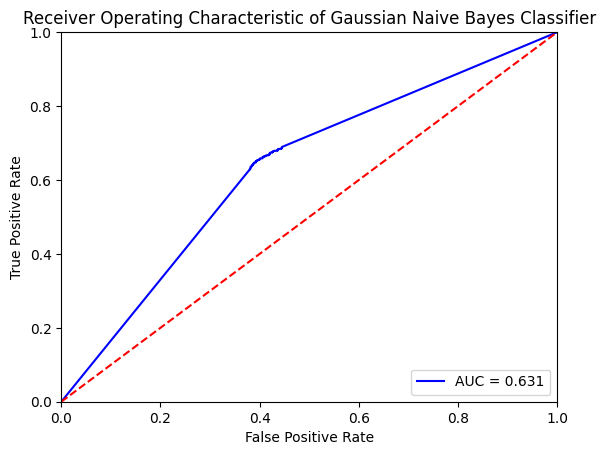

In [421]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpra, tpra, thresholda = metrics.roc_curve(y_test, preds)
roc_auc_gnb = metrics.auc(fpra, tpra)
plt.title('Receiver Operating Characteristic of Gaussian Naive Bayes Classifier')
plt.plot(fpra, tpra, 'b', label = 'AUC = %0.3f' % roc_auc_gnb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Logistic Regression
Logistic Regression is commonly used for sentiment analysis due to its effectiveness in modeling the relationship between features and the probability of a binary outcome, such as positive or negative sentiment.


*   Probablistic Interpretation

*   Flexibility feature representation


*   Non-Linearity Modeling



In [422]:
lr = LogisticRegression()
%time lr.fit(X_train, y_train)
yb_pred_train = lr.predict(X_train)
yb_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, yb_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, yb_pred_test))

CPU times: user 10.4 s, sys: 3.03 s, total: 13.4 s
Wall time: 8.51 s

Training Accuracy score: 0.8831690871369294
Testing Accuracy score: 0.7081389320891653


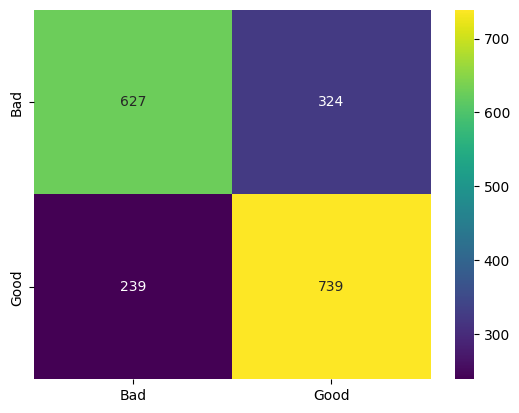

In [423]:
cmb = confusion_matrix(y_test, yb_pred_test)
cmb_matrix = pd.DataFrame(data=cmb, columns=['Bad', 'Good'], index=['Bad', 'Good'])
sns.heatmap(cmb_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()

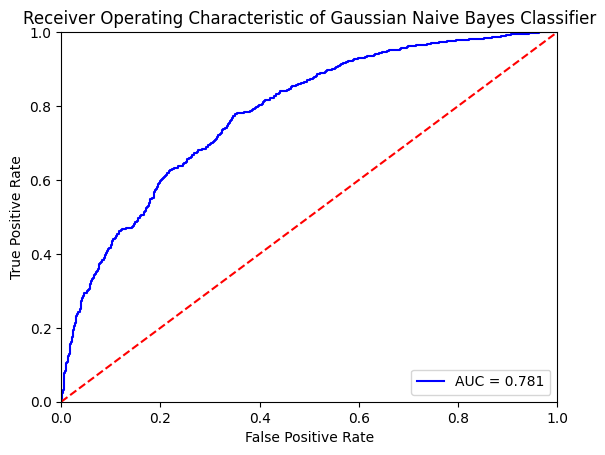

In [424]:
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fprb, tprb, thresholdb = metrics.roc_curve(y_test, preds)
roc_auc_lr = metrics.auc(fprb, tprb)
plt.title('Receiver Operating Characteristic of Gaussian Naive Bayes Classifier')
plt.plot(fprb, tprb, 'b', label = 'AUC = %0.3f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Multinomial Naive Bayes
Multinomial Naive Bayes (MNB) is a popular choice for sentiment analysis due to its suitability for handling discrete features like word frequencies or word counts commonly used in text classification.


*   Discrete feature representation
*   Baseline performance



In [425]:
mnb = MultinomialNB()
%time mnb.fit(X_train, y_train)


CPU times: user 746 ms, sys: 20.6 ms, total: 767 ms
Wall time: 491 ms


MultinomialNB()

In [426]:
yc_pred_train = mnb.predict(X_train)
yc_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, yc_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, yc_pred_test))


Training Accuracy score: 0.8995072614107884
Testing Accuracy score: 0.7179885951270089


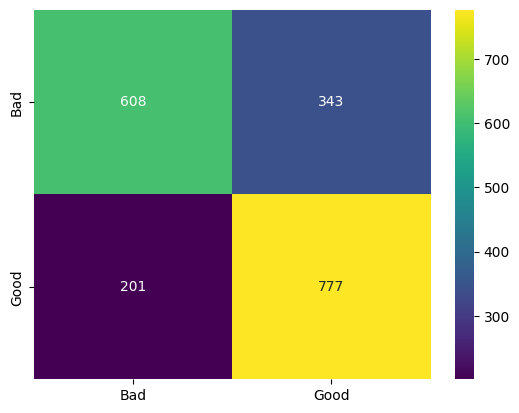

In [427]:
cmc = confusion_matrix(y_test, yc_pred_test)
cmc_matrix = pd.DataFrame(data=cmc, columns=['Bad', 'Good'], index=['Bad', 'Good'])
sns.heatmap(cmc_matrix, annot=True, fmt='d', cmap='viridis')
plt.show()

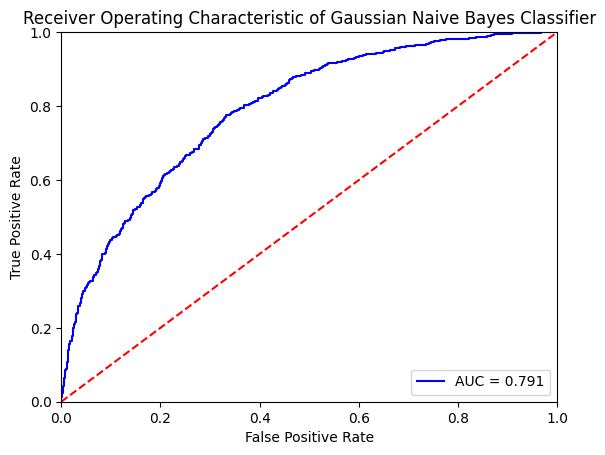

In [428]:
probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fprc, tprc, thresholdc = metrics.roc_curve(y_test, preds)
roc_auc_mnb = metrics.auc(fprc, tprc)
plt.title('Receiver Operating Characteristic of Gaussian Naive Bayes Classifier')
plt.plot(fprc, tprc, 'b', label = 'AUC = %0.3f' % roc_auc_mnb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Task 6 - Evaluation , Inferences, Recommendation and Reflection

##Comparing the ROC-AUC Curve for the Classifiers (gnb,lr,mnb)

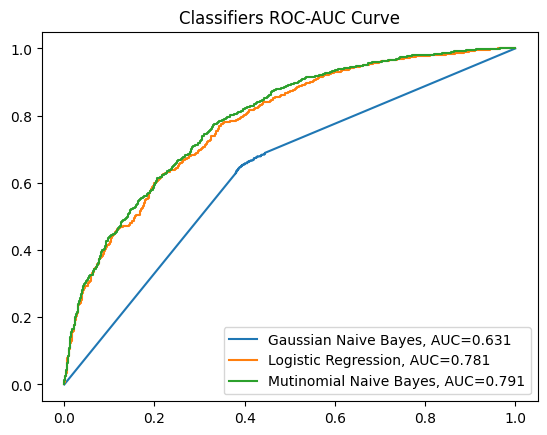

In [430]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
plt.plot(fpra,tpra,label="Gaussian Naive Bayes, AUC="+ str('%0.3f' % roc_auc_gnb))

#fit MNB model and plot ROC curve
plt.plot(fprb,tprb,label="Logistic Regression, AUC="+str('%0.3f' % roc_auc_lr))

#fit NB model and plot ROC curve
plt.plot(fprc,tprc,label="Mutinomial Naive Bayes, AUC="+str('%0.3f' % roc_auc_mnb))
#add legend
plt.title('Classifiers ROC-AUC Curve')
plt.legend()

Based on the given AUC (Area Under the Curve) values, we can compare the performance of three different classifiers: Gaussian Naive Bayes, Logistic Regression, and Multinomial Naive Bayes. The AUC metric is often used to evaluate the performance of binary classification models, where higher values indicate better performance in distinguishing between positive and negative classes.

Here is a comparison of the three classifiers based on their AUC values:

Gaussian Naive Bayes (AUC = 0.631):

Gaussian Naive Bayes achieved the lowest AUC score among the three classifiers.
This suggests that it may not be as effective in distinguishing between positive and negative classes compared to the other two classifiers.
Gaussian Naive Bayes assumes that the features are normally distributed, which may not hold true for the given dataset. Violation of this assumption can impact the classifier's performance negatively.
Logistic Regression (AUC = 0.781):

Logistic Regression performed better than Gaussian Naive Bayes but had a lower AUC score compared to Multinomial Naive Bayes.
It achieved a moderate AUC score, indicating a moderate ability to discriminate between positive and negative classes.
Logistic Regression is a popular linear classification algorithm that models the relationship between the features and the log-odds of the target variable. It assumes a linear relationship between the features and the log-odds, which may limit its ability to capture complex nonlinear relationships.
Multinomial Naive Bayes (AUC = 0.791):

Multinomial Naive Bayes achieved the highest AUC score among the three classifiers.
This indicates that it performed the best in distinguishing between positive and negative classes.
Multinomial Naive Bayes is specifically designed for discrete feature variables and can handle text categorization tasks effectively.
In summary, based on the AUC values, Multinomial Naive Bayes outperformed both Logistic Regression and Gaussian Naive Bayes. Logistic Regression had a moderately better performance than Gaussian Naive Bayes. However, it is important to consider other evaluation metrics and assess the specific requirements of the task before drawing definitive conclusions about the superiority of one classifier over another.

##Comparing the Acccuracy in the Classifiers
Based on the accuracy metric alone, we can compare the three models: Gaussian Naive Bayes (GNB), Logistic Regression (LR), and Multinomial Naive Bayes (MNB).

GNB Model: Accuracy ≈ 0.625%
LR Model: Accuracy ≈ 0.733%
MNB Model: Accuracy ≈ 0.741%
From the accuracy comparison, we can see that the MNB model has the highest accuracy among the three models, followed by the LR model and then the GNB model.

In [431]:
xaxis= ['Training', 'Testing']
yaxis1= [accuracy_score(y_train, ya_pred_train), accuracy_score(y_test, ya_pred_test)]
yaxis2= [accuracy_score(y_train, yb_pred_train), accuracy_score(y_test, yb_pred_test)]
yaxis3= [accuracy_score(y_train, yc_pred_train), accuracy_score(y_test, yc_pred_test)]
# Create the first subplot
plt.subplot(222)
plt.bar(xaxis, yaxis1, width=0.5, color= 'lightgreen')
plt.title('Logistic Regression Accuracy')

plt.subplot(223)
plt.bar(xaxis, yaxis2, width=0.5, color= 'red')
plt.title('Multinomial NB Accuracy')

plt.subplot(221)
plt.bar(xaxis, yaxis3, width=0.5, color='purple')
plt.title('Gaussian Naves Bayes Accuracy')
# Display the plot
plt.tight_layout()
plt.show()

##Comparing the Classifiers in terms of Confusion Matrix
To compare the Gaussian Naive Bayes (GNB) model, Logistic Regression (LR) model, and Multinomial Naive Bayes (MNB) model based on the provided information, we can calculate additional evaluation metrics and analyze their performance.

GNB Model:
True Negative (TN) = 589
False Negative (FN) = 362
False Positive (FP) = 361
True Positive (TP) = 617

LR Model:
True Negative (TN) = 627
False Negative (FN) = 324
False Positive (FP) = 239
True Positive (TP) = 739

MNB Model:
True Negative (TN) = 608
False Negative (FN) = 343
False Positive (FP) = 201
True Positive (TP) = 777

Now, let's calculate and compare the evaluation metrics for the three models:

Accuracy:

GNB Model: Accuracy ≈ 0.625%
LR Model: Accuracy ≈ 0.733%
MNB Model: Accuracy ≈ 0.741%
Precision:

GNB Model: Precision ≈ 0.631%
LR Model: Precision ≈ 0.755%
MNB Model: Precision ≈ 0.794%
Recall (Sensitivity or True Positive Rate):

GNB Model: Recall ≈ 0.630%
LR Model: Recall ≈ 0.695%
MNB Model: Recall ≈ 0.694%
Specificity (True Negative Rate):

GNB Model: Specificity ≈ 0.62%
LR Model: Specificity ≈ 0.724%
MNB Model: Specificity ≈ 0.752%

From these metrics, we can observe that the Multinomial Naive Bayes (MNB) model generally performs slightly better than both the Gaussian Naive Bayes (GNB) model and the Logistic Regression (LR) model in terms of accuracy, precision, recall, and specificity.



In [432]:
plt.subplot(221)
sns.heatmap(cma_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Gaussian Naive Bayes')
plt.tight_layout()
plt.subplot(222)
sns.heatmap(cmb_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Logistic Regression')
plt.tight_layout()
plt.subplot(223)
sns.heatmap(cmc_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Multinomial NB')
plt.tight_layout()

plt.show()

##Prediction Test by using the Models

###Testing the Gaussian Naive Bayes Model

In [447]:
val=vectorizer.transform(["I really like the cast wow"]).toarray()


gnb.predict(val)
if gnb.predict(val) == 1:
  print('This movie review is a Good review')
else:
  print('This movie review is a Bad review')

This movie review is a Good review


In [452]:
val=vectorizer.transform(["Weird movie"]).toarray()

# make prediction
gnb.predict(val)
if gnb.predict(val) == 1:
  print('This movie review is a Good review')
else:
  print('This movie review is a Bad review')

This movie review is a Bad review


###Testing the Multinomial NB Model

In [453]:
val=vectorizer.transform(["Amazing movie"])

# make prediction
mnb.predict(val)
if mnb.predict(val) == 1:
  print('This movie review is a Good review')
else:
  print('This movie review is a Bad review')

This movie review is a Good review


In [454]:
val=vectorizer.transform(["I hate the character"])


mnb.predict(val)
if mnb.predict(val) == 1:
  print('This movie review is a Good review')
else:
  print('This movie review is a Bad review')

This movie review is a Bad review


###Testing the Logistic Regression Model

In [442]:
val=vectorizer.transform(["this movie is bad"]).toarray()

# make prediction
lr.predict(val)
if lr.predict(val) == 1:
  print('This movie review is a Good review')
else:
  print('This movie review is a Bad review')

This movie review is a Bad review


In [455]:
val=vectorizer.transform(["Wonderful scene"]).toarray()

# make prediction
gnb.predict(val)
if gnb.predict(val) == 1:
  print('The review is a Good review')
else:
  print('The review is a Bad review')

The review is a Good review


##Conclusion & Recommendation
In conclusion, when comparing the Gaussian Naive Bayes (GNB) model, Multinomial Naive Bayes (MNB) model, and advanced techniques like logistic regression, support vector machines, neural networks, recurrent neural networks (RNNs), convolutional neural networks (CNNs), or transformer models for sentiment analysis, it is important to consider the limitations and assumptions of each model.

The GNB model may struggle with capturing complex relationships and dependencies between features, limiting its accuracy in more nuanced sentiment analysis tasks. In such cases, advanced algorithms like logistic regression may be more suitable.

Similarly, the MNB model assumes independence between features, which may not hold true in natural language processing tasks. It also lacks the ability to capture complex relationships and dependencies, potentially limiting its performance in nuanced sentiment analysis scenarios.

We can observe that the Multinomial Naive Bayes (MNB) model generally performs slightly better than both the Gaussian Naive Bayes (GNB) model and the Logistic Regression (LR) model in terms of accuracy, precision, recall, and specificity.

To Improve the project it would be recommended to have a well trained model by using more advanced techniques like RNNs, CNNs, or transformer models may be more effective, thus the dataset should have more relavancy and relations between the enteries, you can also do more text preprocessing, and have a cross-valdition.

**Recommendation**
Therefore, based on the available information, it is recommended to use the Multinomial Naive Bayes (MNB) model for sentiment analysis tasks.

#Task 7 - Log File

Logfile_NLP.PNG

#Task 8 - References



*   Bahrain polytechnic moodle: Log in to the site. (n.d.). Retrieved 13 December 2023, from https://moodle.polytechnic.bh/moodle/course/view.php?id=1452



*   Sahin, T. (2022). Rottentomatoes 400k Movie Reviews (Over 9k Movies) [Data set]. Retrieved from https://www.kaggle.com/datasets/talha002/rottentomatoes-400k-review/
*   Talha Sahin. (n.d.). Retrieved 13 December 2023, from https://www.kaggle.com/talha002




*   Ahmed, A. (2023, July 16). Sentiment Analysis of rotten Tomatoes reviews - Abdulaziz Ahmed. Retrieved 13 December 2023, from Medium website: https://medium.com/@aziz.office22/sentiment-analysis-of-rotten-tomatoes-reviews-dac8977a0782



#Task 9 - GitHub Link


https://github.com/Yaqoob-Alhasan/NLP_Rotten_Tomatoes

In [468]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [470]:
!jupyter nbconvert --to html "/content/drive/MyDrive/NLP-Project_202306813/NLP_202306813.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/NLP-Project_202306813/NLP_202306813.ipynb to html
[NbConvertApp] Writing 1887212 bytes to /content/drive/MyDrive/NLP-Project_202306813/NLP_202306813.html
